In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Linear Regression

Gives relationship between two continuous (quantitative) variables. 

Simple linear regression $ y = \beta_{0}+\beta_{1}x $

1. Simulating data points with noise  $ y = \beta_{0}+\beta_{1}x + \epsilon $

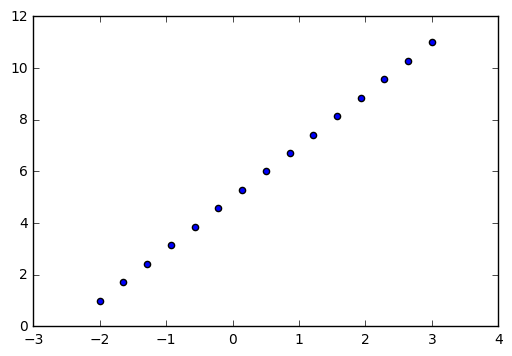

In [2]:
def simulate_points(a, b):
    x = np.linspace(-2,3, 15)
    y = a * x + b
    return (x, y)
    
points = simulate_points(2,5)
plt.scatter(points[0],points[1])

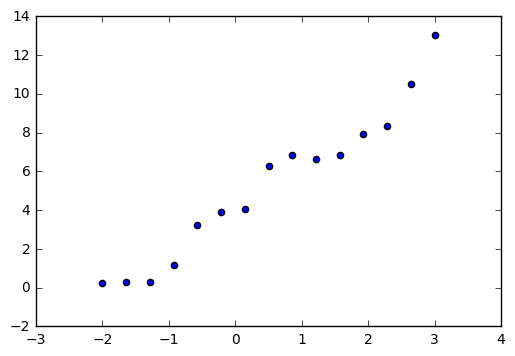

In [3]:
def simulate_points_with_noice(a, b, max_noise):
    x = np.linspace(-2,3, 15)
    epsilon = np.random.uniform(-max_noise, max_noise, len(x))  # getting both positive and negative values
    y = a * x + b + epsilon
    return (x, y)

points = simulate_points_with_noice(2,5,2.5)
plt.scatter(points[0],points[1])

We need to find a line which best goes through this points

Create empty model

In [4]:
model = LinearRegression()

We need to learn our model and to test it. First step is reshaping the data

In [13]:
print("Reshaping the data\n",points[0])

reshaped =points[0].reshape(-1,1)
print("\nData, reshaped: \n",reshaped)

Reshaping the data
 [-2.         -1.64285714 -1.28571429 -0.92857143 -0.57142857 -0.21428571
  0.14285714  0.5         0.85714286  1.21428571  1.57142857  1.92857143
  2.28571429  2.64285714  3.        ]

Data, reshaped: 
 [[-2.        ]
 [-1.64285714]
 [-1.28571429]
 [-0.92857143]
 [-0.57142857]
 [-0.21428571]
 [ 0.14285714]
 [ 0.5       ]
 [ 0.85714286]
 [ 1.21428571]
 [ 1.57142857]
 [ 1.92857143]
 [ 2.28571429]
 [ 2.64285714]
 [ 3.        ]]


In [44]:
points[1]

array([  0.24414559,   0.29448712,   0.31323552,   1.15415593,
         3.23683655,   3.89339152,   4.05415574,   6.26694511,
         6.85537537,   6.64172469,   6.86163222,   7.92538862,
         8.32316618,  10.53816076,  13.04264671])

In [14]:
# takes two main arguments - Training data, Target values. Tird one is Individual weights for each sample
model.fit(reshaped, points[1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We have trained model. There are input parameters and such calculated in the process of thraining. The output parameters ends with underscore _

To see the coefficients in the model (that are behind each attribute)

In [15]:
model.coef_

array([ 2.37358407])

In [24]:
model.coef_[0]

2.3735840664971137

In [16]:
model.intercept_

4.1229044744068899

The meaning of above is expressed by the graphic line: y = 2.37358407x + 4.1229044744068899

We can see the predic output for value 3

In [19]:
model.predict(3)

array([ 11.24365667])

To predict many values

In [21]:
model.predict([[0], [1], [2]])

array([ 4.12290447,  6.49648854,  8.87007261])

Plot the line that models the data and the data used to train the model.

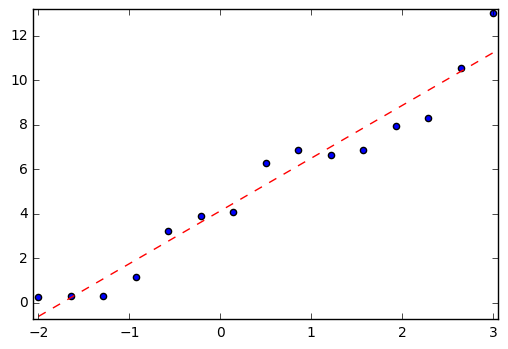

In [43]:
x_fit = np.linspace(-2,3,10)
y_fit = model.coef_[0] * x_fit + model.intercept_
plt.scatter(points[0],points[1])
plt.plot(x_fit,y_fit,color="red",ls="dashed")
plt.margins(0.01)